#### Key Summary  

1. Temperatures appear to reach the highest near 20 degrees latitude.
2. Temperatures are higher at latitudes closer to the equator. Temperatures are lower towards the earth's poles.
3. The datasets for cloudiness and wind speed don't seem to have any correlation to latitude, or proximity to the equator.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
import numpy as np
from ratelimiter import RateLimiter
from citipy import citipy
from scipy.stats import linregress

output_data_file = "output_data/cities.csv" #Output csv file 

# Range of latitudes and longitudes
lat_range = (-70, 70) #using -70/80 as there are less cities near the poles
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

509

In [3]:
#Perform API Calls------------------------------------------- 

#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1  

# 60 calls/minute or 1,000,000 calls/month LIMIT for FREE API https://openweathermap.org/price 
rate_limiter = RateLimiter(max_calls=60, period=60)  


#Perform API Calls-------------------------------------------  


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


#For loop matching city names with city_list using enumerate method

for index, city in enumerate(cities, start = 1):
    with rate_limiter:
        try:
            response = requests.get(query_url + city).json()
            city_list.append(response["name"])
            cloud_list.append(response["clouds"]["all"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            humidity_list.append(response["main"]["humidity"])
            lats_list.append(response["coord"]["lat"])
            lngs_list.append(response["coord"]["lon"])
            temp_max_list.append(response['main']['temp_max'])
            wind_speed_list.append(response["wind"]["speed"])

            if index_counter > 49:
                index_counter = 0
                set_counter = set_counter + 1

            else:
                index_counter = index_counter + 1

            print(f"Processing Record {index_counter} of Set {set_counter} : {city}")

        except(KeyError, IndexError):
            print("City not found. Skipping...")

print("-------------------------------")
print("Data received from OpenWeather API")
print("-------------------------------")
            

Processing Record 1 of Set 1 : rikitea
City not found. Skipping...
Processing Record 2 of Set 1 : castro
Processing Record 3 of Set 1 : norman wells
Processing Record 4 of Set 1 : aksarka
Processing Record 5 of Set 1 : ahipara
Processing Record 6 of Set 1 : esperance
City not found. Skipping...
Processing Record 7 of Set 1 : kaeo
Processing Record 8 of Set 1 : ixtapa
Processing Record 9 of Set 1 : mangan
Processing Record 10 of Set 1 : port alfred
Processing Record 11 of Set 1 : cheney
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 : barra do garcas
Processing Record 13 of Set 1 : okhotsk
City not found. Skipping...
Processing Record 14 of Set 1 : bluff
Processing Record 15 of Set 1 : sorland
Processing Record 16 of Set 1 : aswan
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : aksu
Processing Record 19 of Set 1 : kosh-agach
Processing Record 20 of Set 1 : katsuura
Processing Record 21 of Set 1 : kimbe
Processing Record 22 of 

Processing Record 35 of Set 4 : bad neuenahr-ahrweiler
Processing Record 36 of Set 4 : bengkulu
Processing Record 37 of Set 4 : vostok
Processing Record 38 of Set 4 : luanda
Processing Record 39 of Set 4 : pemba
Processing Record 40 of Set 4 : cedar city
Processing Record 41 of Set 4 : hastings
Processing Record 42 of Set 4 : pergamino
Processing Record 43 of Set 4 : fort nelson
Processing Record 44 of Set 4 : quatre cocos
Processing Record 45 of Set 4 : san patricio
Processing Record 46 of Set 4 : tautira
Processing Record 47 of Set 4 : bubaque
Processing Record 48 of Set 4 : elk plain
Processing Record 49 of Set 4 : cidreira
Processing Record 50 of Set 4 : sao miguel do tapuio
Processing Record 0 of Set 5 : fasa
Processing Record 1 of Set 5 : bambous virieux
Processing Record 2 of Set 5 : bainbridge
Processing Record 3 of Set 5 : roald
Processing Record 4 of Set 5 : ribas do rio pardo
Processing Record 5 of Set 5 : cobija
City not found. Skipping...
Processing Record 6 of Set 5 : teg

City not found. Skipping...
Processing Record 25 of Set 8 : beachwood
Processing Record 26 of Set 8 : beboto
Processing Record 27 of Set 8 : la orilla
Processing Record 28 of Set 8 : zhangjiakou
Processing Record 29 of Set 8 : vrindavan
Processing Record 30 of Set 8 : pavlysh
Processing Record 31 of Set 8 : port hedland
Processing Record 32 of Set 8 : kadnikov
Processing Record 33 of Set 8 : hobyo
Processing Record 34 of Set 8 : piranshahr
Processing Record 35 of Set 8 : kautokeino
Processing Record 36 of Set 8 : sao sebastiao
Processing Record 37 of Set 8 : rayong
Processing Record 38 of Set 8 : avera
Processing Record 39 of Set 8 : brigantine
Processing Record 40 of Set 8 : artyom
Processing Record 41 of Set 8 : kaduqli
Processing Record 42 of Set 8 : lundazi
Processing Record 43 of Set 8 : cori
Processing Record 44 of Set 8 : poronaysk
Processing Record 45 of Set 8 : paracuru
Processing Record 46 of Set 8 : limon
Processing Record 47 of Set 8 : tshane
Processing Record 48 of Set 8 :

In [4]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

#Count weather data
weather_data.count()

City          477
Lat           477
Lng           477
Max Temp      477
Humidity      477
Clouds        477
Wind Speed    477
Country       477
Date          477
dtype: int64

In [5]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.71,75,50,14.56,PF,1613532705
1,Castro,-24.7911,-50.0119,61.12,93,2,4.14,BR,1613532502
2,Norman Wells,65.2820,-126.8329,-9.40,77,75,3.44,CA,1613532706
3,Aksarka,66.5606,67.7975,-16.19,88,100,4.74,RU,1613532706
4,Ahipara,-35.1667,173.1667,71.67,66,34,7.45,NZ,1613532706


In [6]:
#Save weather data to a cities csv file
weather_data.to_csv("Resources/cities.csv", index=False)

### The first requirement is to create a series of scatter plots to showcase the following relationships:  
Temperature (F) vs. Latitude  
Humidity (%) vs. Latitude  
Cloudiness (%) vs. Latitude  
Wind Speed (mph) vs. Latitude  


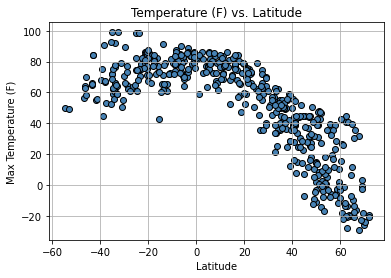

In [7]:
#Temperature (F) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

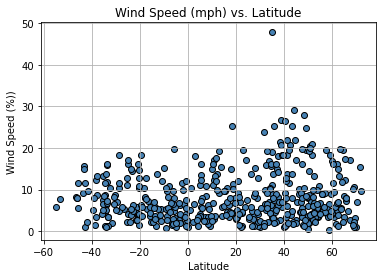

In [8]:
#Wind Speed (mph) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

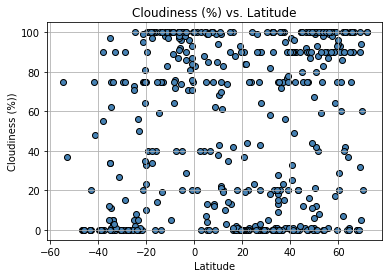

In [9]:
#Cloudiness (%) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

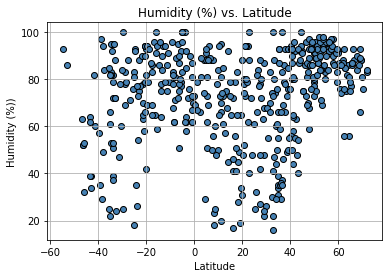

In [10]:
#Humidity (%) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

### The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude  
Southern Hemisphere - Temperature (F) vs. Latitude  
Northern Hemisphere - Humidity (%) vs. Latitude  
Southern Hemisphere - Humidity (%) vs. Latitude  
Northern Hemisphere - Cloudiness (%) vs. Latitude  
Southern Hemisphere - Cloudiness (%) vs. Latitude  
Northern Hemisphere - Wind Speed (mph) vs. Latitude  
Southern Hemisphere - Wind Speed (mph) vs. Latitude  

In [11]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

The linear equation is: y = -1.43x + 93.28
The r value is: 0.7592498305347507


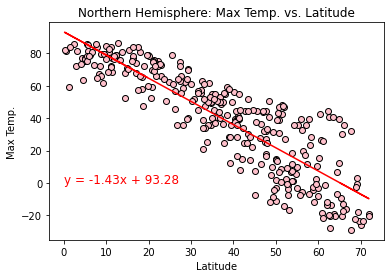

In [12]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_maxtemp_latitude_lr.png")

The linear equation is: y = 0.37x + 81.9
The r value is: 0.19604814986826835


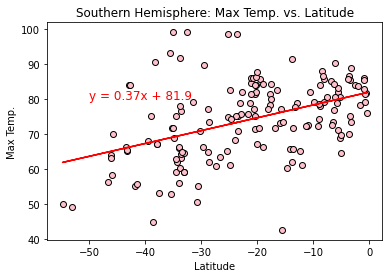

In [13]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_maxtemp_latitude_lr.png")

The linear equation is: y = 0.43x + 57.39
The r value is: 0.15290386508869924


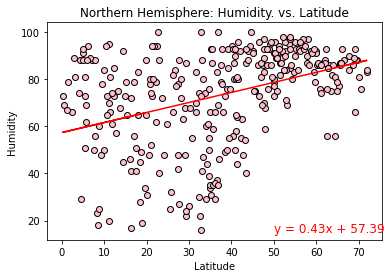

In [14]:
y_values = northern_hemisphere["Humidity"]
x_values = northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Humidity. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (50,15), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_humidity_latitude_lr.png")

The linear equation is: y = 0.47x + 83.51
The r value is: 0.10824507412010874


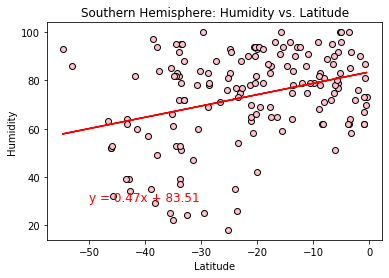

In [15]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-50,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_humidity_latitude_lr.png")

The linear equation is: y = 0.43x + 36.38
The r value is: 0.03810746184724118


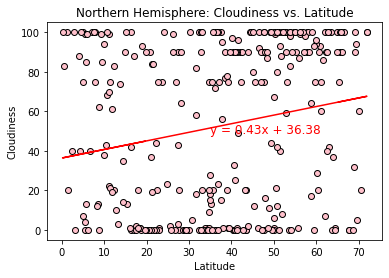

In [16]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (35,49), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_cloudiness_latitude_lr.png")

The linear equation is: y = 1.84x + 90.04
The r value is: 0.3699870014309355


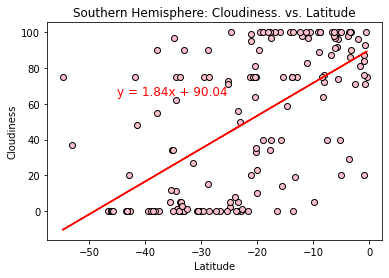

In [17]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Cloudiness. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-45,65), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_cloudiness_latitude_lr.png")

The linear equation is: y = 0.02x + 7.98
The r value is: 0.0018668984459823445


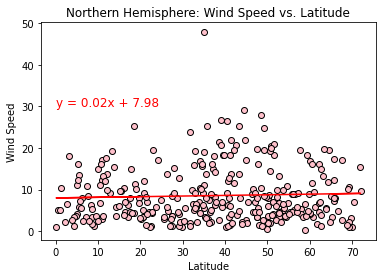

In [18]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_windspeed_latitude_lr.png")

The linear equation is: y = -0.07x + 5.38
The r value is: 0.044274533722892834


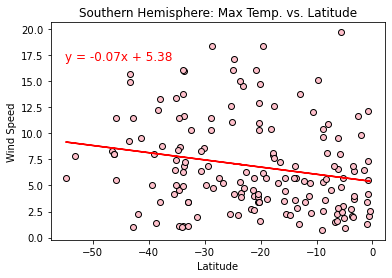

In [19]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-55,17), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_windspeed_latitude_lr.png")